In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [2]:
# build simple linear data
weight = 0.7
bias = 0.3

x = torch.arange(0, 1, step=0.02).reshape((-1, 1))
y = weight * x + bias
num_trains = int(0.8 * len(x))
x_train = x[:num_trains]
y_train = y[:num_trains]
x_test = x[num_trains:]
y_test = y[num_trains:]


In [3]:
def plot_results(xtr, ytr, xtst, ytst, ypred = None):
	plt.scatter(xtr, ytr, s=20, label='train')
	plt.scatter(xtst, ytst, s=20, label='test')
	if ypred is not None:
		plt.scatter(xtst, ypred, s=20, label='prediction')
	plt.legend(prop={'size': 13})
	plt.show()


In [4]:
class LRModel(nn.Module):
	def __init__(self, *args, **kwargs) -> None:
		super().__init__(*args, **kwargs)

		self.weight = nn.Parameter(
			torch.randn(1, requires_grad=True)
		)

		self.bias = nn.Parameter(
			torch.randn(1, requires_grad=True)
		)


	def forward(self, X: torch.Tensor) -> torch.Tensor:
		return self.weight * X + self.bias


OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


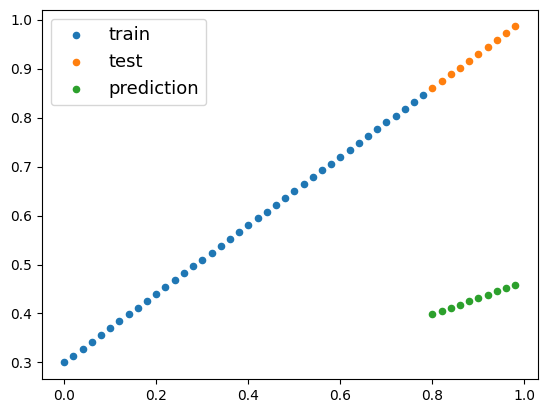

In [14]:
torch.manual_seed(42)

model = LRModel()

#print(list(model.parameters()))
print(model.state_dict())

# using this .inference_mode will basically disable gradient tracking and only care about predicting
# this is useful when we are not during training -> faster predictions
with torch.inference_mode():
	y_pred = model(x_test)


plot_results(x_train, y_train, x_test, y_test, y_pred)


In [15]:
# loss
loss_fn = nn.L1Loss()

# optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


In [22]:
# train loop
num_epochs = 150

for epoch in range(num_epochs):
	model.train()

	# forward pass
	pred = model(x_train)

	# calculate loss, pred then ytrue0
	loss = loss_fn(pred, y_train)

	# emtpy the accumulated gradients
	optimizer.zero_grad()

	# perform backprop on loss
	loss.backward()

	# optimize parameters based on the previous step
	# basically performing gradient descent
	optimizer.step()


	# now one step of the training is done, we can exit training mode and test
	model.eval()
	# go to prediction mode with this context manager
	with torch.inference_mode():
		test_pred = model(x_test)
		test_loss = loss_fn(test_pred, y_test)

	if epoch % 10 == 0:
		print(f'epoch {epoch:0>3}: loss={loss:.2f}\ttest_loss={test_loss:.2f}\t')


epoch 000: loss=0.01	test_loss=0.01	
epoch 010: loss=0.01	test_loss=0.01	
epoch 020: loss=0.01	test_loss=0.01	
epoch 030: loss=0.01	test_loss=0.01	
epoch 040: loss=0.01	test_loss=0.01	
epoch 050: loss=0.01	test_loss=0.01	
epoch 060: loss=0.01	test_loss=0.01	
epoch 070: loss=0.01	test_loss=0.01	
epoch 080: loss=0.01	test_loss=0.01	
epoch 090: loss=0.01	test_loss=0.01	
epoch 100: loss=0.01	test_loss=0.01	
epoch 110: loss=0.01	test_loss=0.01	
epoch 120: loss=0.01	test_loss=0.01	
epoch 130: loss=0.01	test_loss=0.01	
epoch 140: loss=0.01	test_loss=0.01	


In [17]:
model.state_dict()


OrderedDict([('weight', tensor([0.6638])), ('bias', tensor([0.3153]))])

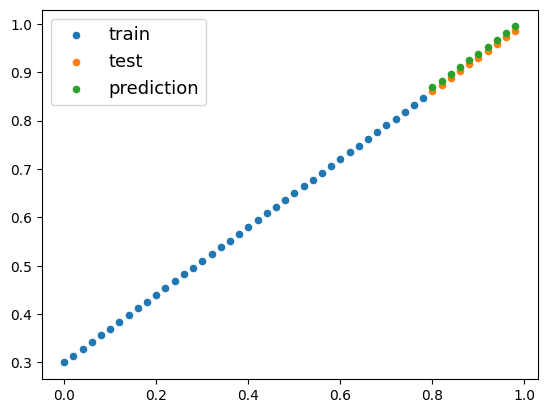

In [23]:
plot_results(x_train, y_train, x_test, y_test, test_pred)


In [49]:
# the whole training process

# choose loss function
# nn.L1Loss or nn.MSELoss

# choose optimizer
# torch.optim.SGD or torch.optim.adam

# train loop
	# model.train() -> enter training mode

	# pred = model(x_train) -> forward pass

	# loss = loss_fn(pred, y_train) -> calculate loss

	# zero the optimizer
	# optimizer.zero_grad()

	# perform backprop on loss
	# loss.backward()

	# optimize params for example with gradient descent
	# optimizer.step()

	# turn on eval mode
	# model.eval()

	# turn on prediction mode
	# with torch.inference_mode()
		# test_pred = model(x_test)
		# test_loss = loss_fn(test_pred, y_test)


In [24]:
# save/load models
torch.save(obj=model.state_dict(), f='params.pth')

# trying to load the model into another model
model_loaded = LRModel()
print(model_loaded.state_dict())

model_loaded.load_state_dict(torch.load(f='params.pth', weights_only=True))
print(model_loaded.state_dict())


OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [ ]:
#from pathlib import Path

#MODELS_PATH = Path('models')
#MODELS_PATH.mkdir(parents=True, exist_ok=True)

#MODEL_NAME = 'pytorch_intro.pth'
#MODEL_SAVE_PATH = MODELS_PATH / MODEL_NAME
